## Grades of Students dataset

#### Problem Statement:
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description    --  total 43 columns
- Seat No : The enrolled number of candidate that took the exams

- CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

 

- All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


Predict   CGPA of a student based on different grades in four years.

In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Grades.csv')
df.head(6)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205/20,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
5,CS-97006,A,B-,B,D+,C+,A-,C+,B,B+,B+,C-,A-,B-,B+,A-,B+,B,A-,B,A-,A-,C+,B+,C-,A-,B-,C+,B,A-,A-,B-,B+,C,B-,C+,C+,A-,A-,B+,B-,B,3.026


- There are 42 columns in dataset in which 41 columns(independent variables) are Categorical and the Target Variable is Numerical 
- This is a Regression Problem

In [3]:
#Renaming Headers
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [4]:
df.rename(columns={'HS-105/12': 'HS-105', 'HS-205/20': 'HS-205'},inplace=True)

In [5]:
df = df.rename(columns={'PH-':'Physics','CY-':'Chemistry','CS-':'Culture and Social Studies','MT-':'Maths','EL-':'Element','HS-':'Hindi and Sanskrit'}) 

In [6]:
#Dropping Inconsistent Columns
df.drop(['Seat No.'],axis='columns',inplace=True)
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-,B+,D,A-,B-,C+,D+,D+,D,A,D,C-,C,C-,C+,B,C,C+,B+,C,C-,C,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,A,D,D+,D,B-,C,D,A,D+,D,B+,C+,B-,C-,D+,D+,D,C,D,B-,C,D,D+,D,C-,A-,D+,C-,C-,C,A-,D,D+,D,C,D,A-,B-,C,C,B,2.008
2,A,B,A,B-,B+,A,B-,B+,A-,A-,B-,A-,A,A,A,A,A+,A,A-,A,A-,A,A,C+,A,B+,A-,B,A,B+,A-,A-,B,B,A,C,A,A,A,A-,A,3.608
3,D,C+,D+,D,D,A-,D+,C-,D,C+,D,B,D+,B-,D,C,B+,C+,D,D+,D,D,D+,D,B-,D,B-,D+,C-,D+,B+,C-,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,C,A,A,A-,A-,A-,B-,A,A-,A,A-,A-,C+,C-,A-,B-,A-,C+,A-,A-,B-,A-,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


### Data Preprocessing

#### Missing Values

In [7]:
df.isnull().sum()

PH-121     0
HS-101     0
CY-105     1
HS-105     1
MT-111     2
CS-105     0
CS-106     2
EL-102     2
EE-119     2
ME-107     2
CS-107     2
HS-205     5
MT-222     5
EE-222     7
MT-224     7
CS-210     7
CS-211     5
CS-203     5
CS-214     6
EE-217     6
CS-212     6
CS-215     6
MT-331     9
EF-303    10
HS-304    10
CS-301    10
CS-302    10
TC-383    10
MT-442    10
EL-332     9
CS-318     9
CS-306     9
CS-312    10
CS-317    12
CS-403    12
CS-421    12
CS-406    85
CS-414    13
CS-419    13
CS-423    14
CS-412    79
CGPA       0
dtype: int64

- Almost all colunmns have missing values

In [8]:
# for each column, get value counts in decreasing order and take the index (value) of most common class
# replaces missing data with modes

df_most_common_imputed = df.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [9]:
df[df.duplicated(keep=False)]

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA


In [10]:
#Pre-processing the columns names
from string import digits

#Removing tab spaces
df.columns = df.columns.str.replace('\t','')

#Removing digits
remove_digits = str.maketrans('', '', digits)
df.columns = df.columns.str.translate(remove_digits)

#Removing leading and trailling spaces
df.columns = df.columns.str.strip()

In [11]:
# locates records with Wu and W then drops by their indices
df = df_most_common_imputed   
for i in df.columns:
    df.drop(df[(df.loc[:,i]=='WU')| (df.loc[:,i]=='W')].index,inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.columns

Index(['PH-121', 'HS-101', 'CY-105', 'HS-105', 'MT-111', 'CS-105', 'CS-106',
       'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205', 'MT-222', 'EE-222',
       'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214', 'EE-217', 'CS-212',
       'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301', 'CS-302', 'TC-383',
       'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312', 'CS-317', 'CS-403',
       'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423', 'CS-412', 'CGPA'],
      dtype='object')

### Encoding Categorical Values

In [14]:
for column in df.columns:
    
    df[column]=df[column].replace('A+',4.0)
    df[column]=df[column].replace('A',4.0)
    df[column]=df[column].replace('A-',3.7)
    df[column]=df[column].replace('B+',3.4)
    df[column]=df[column].replace('B',3.0)
    df[column]=df[column].replace('B-',2.7)
    df[column]=df[column].replace('C+',2.4)
    df[column]=df[column].replace('C',2.0)
    df[column]=df[column].replace('C-',1.7)
    df[column]=df[column].replace('D+',1.4)
    df[column]=df[column].replace('D',1.0)
    df[column]=df[column].replace('F',0.0)

In [15]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2.7,1.4,1.7,2.0,1.7,1.4,1.0,1.7,2.7,1.7,1.7,3.4,1.0,3.7,2.7,2.4,1.4,1.4,1.0,4.0,1.0,1.7,2.0,1.7,2.4,3.0,2.0,2.4,3.4,2.0,1.7,2.0,1.7,1.7,1.7,1.7,3.7,4.0,1.7,3.0,3.7,2.205
1,4.0,1.0,1.4,1.0,2.7,2.0,1.0,4.0,1.4,1.0,3.4,2.4,2.7,1.7,1.4,1.4,1.0,2.0,1.0,2.7,2.0,1.0,1.4,1.0,1.7,3.7,1.4,1.7,1.7,2.0,3.7,1.0,1.4,1.0,2.0,1.0,3.7,2.7,2.0,2.0,3.0,2.008
2,4.0,3.0,4.0,2.7,3.4,4.0,2.7,3.4,3.7,3.7,2.7,3.7,4.0,4.0,4.0,4.0,4.0,4.0,3.7,4.0,3.7,4.0,4.0,2.4,4.0,3.4,3.7,3.0,4.0,3.4,3.7,3.7,3.0,3.0,4.0,2.0,4.0,4.0,4.0,3.7,4.0,3.608
3,1.0,2.4,1.4,1.0,1.0,3.7,1.4,1.7,1.0,2.4,1.0,3.0,1.4,2.7,1.0,2.0,3.4,2.4,1.0,1.4,1.0,1.0,1.4,1.0,2.7,1.0,2.7,1.4,1.7,1.4,3.4,1.7,1.4,2.0,1.4,1.7,2.7,3.0,2.4,2.4,2.4,1.906
4,3.7,3.7,3.7,3.4,4.0,4.0,3.7,3.4,4.0,3.7,2.0,4.0,4.0,3.7,3.7,3.7,2.7,4.0,3.7,4.0,3.7,3.7,2.4,1.7,3.7,2.7,3.7,2.4,3.7,3.7,2.7,3.7,2.7,3.4,3.4,2.7,3.7,4.0,3.7,3.7,4.0,3.448


#### Converting to Integer Datatype

In [16]:
for col in df.columns:
    df[col] = df[col].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PH-121  547 non-null    int32
 1   HS-101  547 non-null    int32
 2   CY-105  547 non-null    int32
 3   HS-105  547 non-null    int32
 4   MT-111  547 non-null    int32
 5   CS-105  547 non-null    int32
 6   CS-106  547 non-null    int32
 7   EL-102  547 non-null    int32
 8   EE-119  547 non-null    int32
 9   ME-107  547 non-null    int32
 10  CS-107  547 non-null    int32
 11  HS-205  547 non-null    int32
 12  MT-222  547 non-null    int32
 13  EE-222  547 non-null    int32
 14  MT-224  547 non-null    int32
 15  CS-210  547 non-null    int32
 16  CS-211  547 non-null    int32
 17  CS-203  547 non-null    int32
 18  CS-214  547 non-null    int32
 19  EE-217  547 non-null    int32
 20  CS-212  547 non-null    int32
 21  CS-215  547 non-null    int32
 22  MT-331  547 non-null    int32
 23  EF-303  547 non

### Correlation

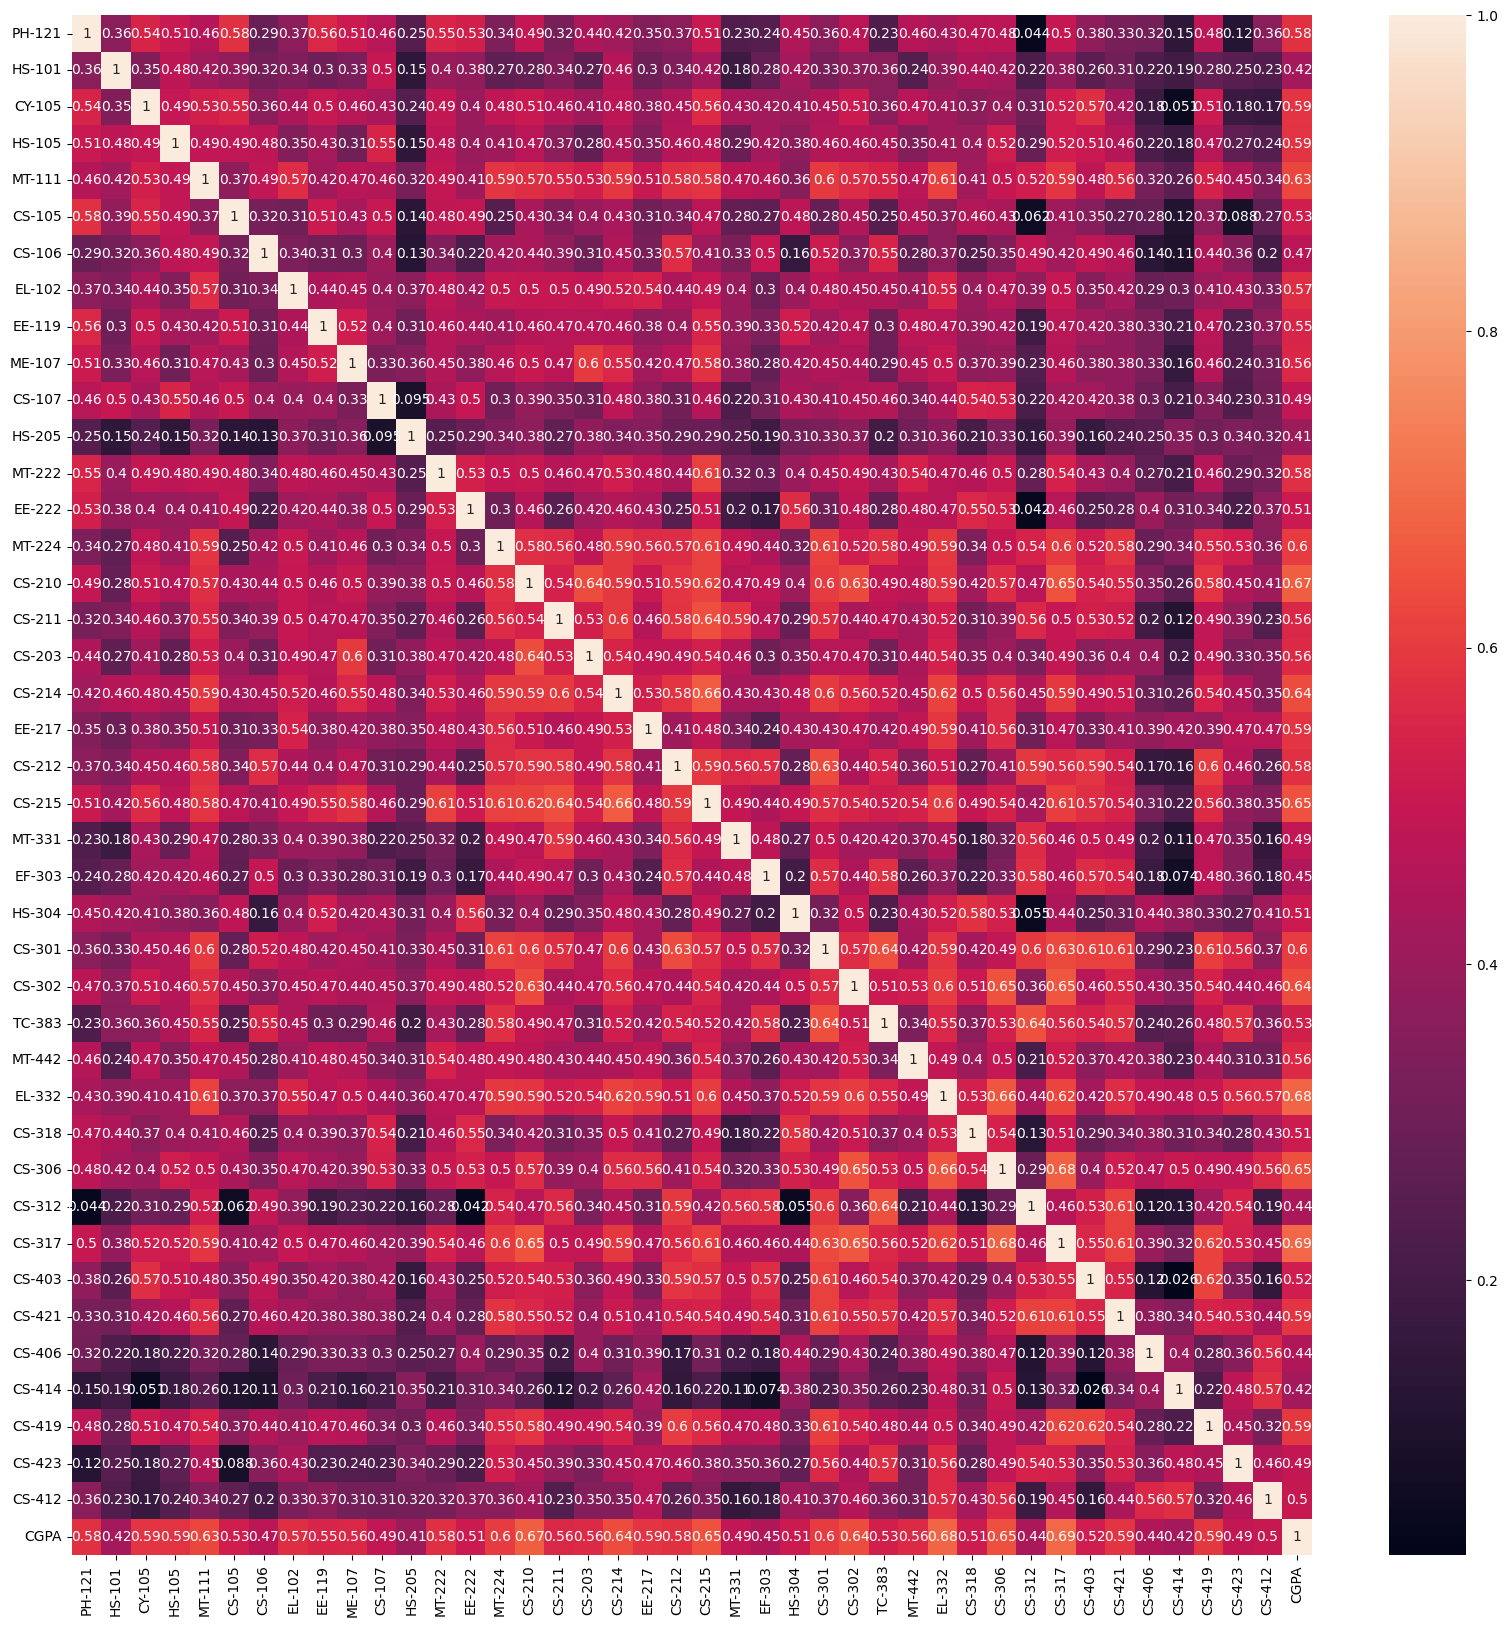

In [18]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [19]:
df.head()

,PH-121,HS-101,CY-105,HS-105,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107,HS-205,MT-222,EE-222,MT-224,CS-210,CS-211,CS-203,CS-214,EE-217,CS-212,CS-215,MT-331,EF-303,HS-304,CS-301,CS-302,TC-383,MT-442,EL-332,CS-318,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,2,1,1,2,1,1,1,1,2,1,1,3,1,3,2,2,1,1,1,4,1,1,2,1,2,3,2,2,3,2,1,2,1,1,1,1,3,4,1,3,3,2
1,4,1,1,1,2,2,1,4,1,1,3,2,2,1,1,1,1,2,1,2,2,1,1,1,1,3,1,1,1,2,3,1,1,1,2,1,3,2,2,2,3,2
2,4,3,4,2,3,4,2,3,3,3,2,3,4,4,4,4,4,4,3,4,3,4,4,2,4,3,3,3,4,3,3,3,3,3,4,2,4,4,4,3,4,3
3,1,2,1,1,1,3,1,1,1,2,1,3,1,2,1,2,3,2,1,1,1,1,1,1,2,1,2,1,1,1,3,1,1,2,1,1,2,3,2,2,2,1
4,3,3,3,3,4,4,3,3,4,3,2,4,4,3,3,3,2,4,3,4,3,3,2,1,3,2,3,2,3,3,2,3,2,3,3,2,3,4,3,3,4,3


In [23]:
X = df.drop('CGPA',axis = 1)
y = df.CGPA

In [24]:
from sklearn.preprocessing import LabelEncoder 
# Fit the  transform:
LE=LabelEncoder()
df["CGPA"]=LE.fit_transform(df["CGPA"])

In [25]:
df.CGPA.value_counts()

3    299
2    214
1     33
0      1
Name: CGPA, dtype: int64

### Over Sampling

In [32]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [34]:
oversample = RandomOverSampler(sampling_strategy='minority')
X, y = oversample.fit_resample(X, y)
X, y = make_classification(n_samples=571, weights=[0.32], flip_y=0)

In [36]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=571, weights=[0.32], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X, y = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y))

Counter({1: 388, 0: 183})
Counter({1: 388, 0: 388})


### Model Training

#### Model Selection

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

In [38]:
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#### Logistic Regression

In [39]:
#import lOGISTIC REGRESSION model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 83.50515463917526
Training Accuracy 83.50515463917526
[[82 21]
 [11 80]]
              precision    recall  f1-score   support

           0       0.88      0.80      0.84       103
           1       0.79      0.88      0.83        91

    accuracy                           0.84       194
   macro avg       0.84      0.84      0.84       194
weighted avg       0.84      0.84      0.84       194



#### KNeighborsClassifier

In [40]:
#import KNN (KNeighborsClassifier) model:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_test,predKNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

Test Accuracy 82.4742268041237
Training Accuracy 82.4742268041237
[[88 15]
 [19 72]]
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       103
           1       0.83      0.79      0.81        91

    accuracy                           0.82       194
   macro avg       0.83      0.82      0.82       194
weighted avg       0.82      0.82      0.82       194



#### DecisontreeClassifier

In [41]:
#import DecisontreeClassifier predicting accuracy for best quality of wine:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 83.50515463917526
Training Accuracy 83.50515463917526
[[96  7]
 [ 8 83]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       103
           1       0.92      0.91      0.92        91

    accuracy                           0.92       194
   macro avg       0.92      0.92      0.92       194
weighted avg       0.92      0.92      0.92       194



#### RandomForestClassifier

In [42]:
#import RandomForestClassifier model:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_test,predrdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 95.87628865979381
Training Accuracy 95.87628865979381
[[102   1]
 [  7  84]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       103
           1       0.99      0.92      0.95        91

    accuracy                           0.96       194
   macro avg       0.96      0.96      0.96       194
weighted avg       0.96      0.96      0.96       194



#### Random Forest Classifier Performs the best

#### CROSS VALIDATION

In [44]:
from sklearn.model_selection import cross_val_score
#validation accuracy
CV=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RandomForestClassifier model :",CV.mean())

Cross Validation Score of RandomForestClassifier model : 0.9355334987593051


#### HyperParameterTunning:

In [45]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

In [46]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=8)

In [47]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.9587628865979382

#### Saving the Model

In [48]:
import joblib
joblib.dump(GCV.best_estimator_,"Grade of students.dataset.pkl")

['Grade of students.dataset.pkl']